In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/Administrator/Downloads/healthcare_data.csv')
df

,patient_id,first_name,last_name,age,gender,phone,email,department,diagnosis,treatment,admission_date,discharge_date,status,bill_amount
0,PID1000,Victor,Hoffman,60,Male,578-267-5326x77210,turnermichelle@example.org,Pediatrics,Migraine,Medication,2024-02-10,2025-06-01,Admitted,100900.97
1,PID1001,John,Sparks,11,Other,(263)977-2102x55652,amandagarner@example.net,Dermatology,Diabetes,Medication,2023-11-18,2025-01-26,Discharged,120905.91
2,PID1002,Isabella,Rubio,2,Female,275.597.9494,james75@example.org,Neurology,Asthma,Medication,2023-12-04,2025-03-02,Under Treatment,170672.18
3,PID1003,Allison,Hill,22,Other,4857130035,salazaralice@example.net,Cardiology,Cancer,Observation,2023-12-25,2024-10-07,Discharged,149977.74
4,PID1004,James,Berry,8,Female,791-362-4064,christinaalexander@example.net,Neurology,Cancer,Observation,2025-02-14,2024-11-15,Under Treatment,160039.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17493,PID18493,Patricia,Bates,31,Male,001-505-697-3292,baldwintiffany@example.com,Pediatrics,Flu,Surgery,2025-06-14,2025-06-04,Under Treatment,140589.34
17494,PID18494,Ethan,Jensen,81,Other,434-983-8764,cummingselizabeth@example.net,Orthopedics,Migraine,Therapy,2024-06-27,2024-11-09,Under Treatment,167515.69
17495,PID18495,Steven,Barrett,59,Female,274-486-1625,mary85@example.org,Neurology,Flu,Medication,2025-08-28,2025-01-22,Discharged,61886.23
17496,PID18496,Nancy,Moss,31,Male,(609)859-0475,hoganshannon@example.org,Neurology,Cancer,Observation,2024-03-17,2025-01-06,Discharged,106990.03


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17498 entries, 0 to 17497
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      17498 non-null  object 
 1   first_name      17498 non-null  object 
 2   last_name       17498 non-null  object 
 3   age             17498 non-null  int64  
 4   gender          17498 non-null  object 
 5   phone           17498 non-null  object 
 6   email           17498 non-null  object 
 7   department      17498 non-null  object 
 8   diagnosis       17498 non-null  object 
 9   treatment       17498 non-null  object 
 10  admission_date  17498 non-null  object 
 11  discharge_date  17498 non-null  object 
 12  status          17498 non-null  object 
 13  bill_amount     17498 non-null  float64
dtypes: float64(1), int64(1), object(12)
memory usage: 1.9+ MB


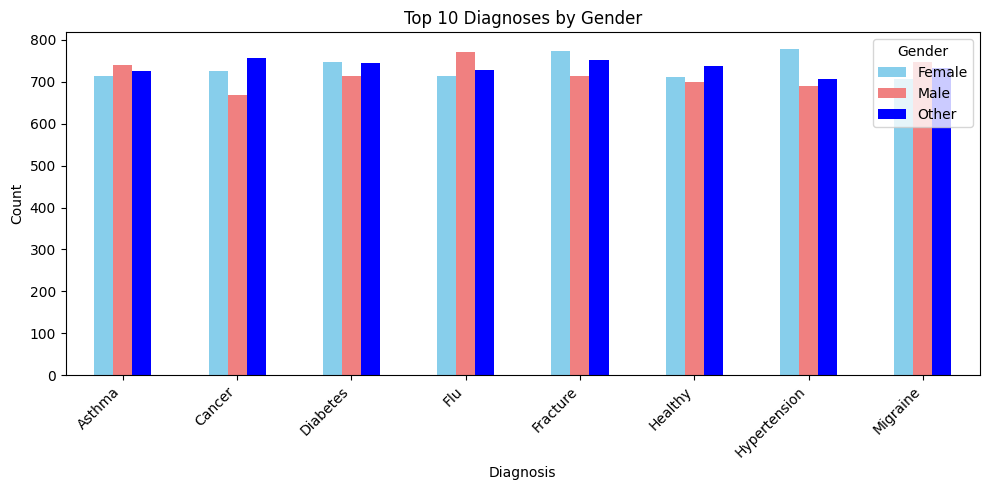

In [20]:
# This analysis detects gender-specific disease patterns by examining the distribution of top diagnoses across genders.
# It helps identify which diagnoses are more prevalent in males vs females.
import matplotlib.pyplot as plt
top_diags = df['diagnosis'].value_counts().head(10).index
diag_gender = df[df['diagnosis'].isin(top_diags)].groupby(['diagnosis', 'gender']).size().unstack().fillna(0)
plt.figure(figsize=(10,5))
diag_gender.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral','blue'])
plt.title('Top 10 Diagnoses by Gender')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
# plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

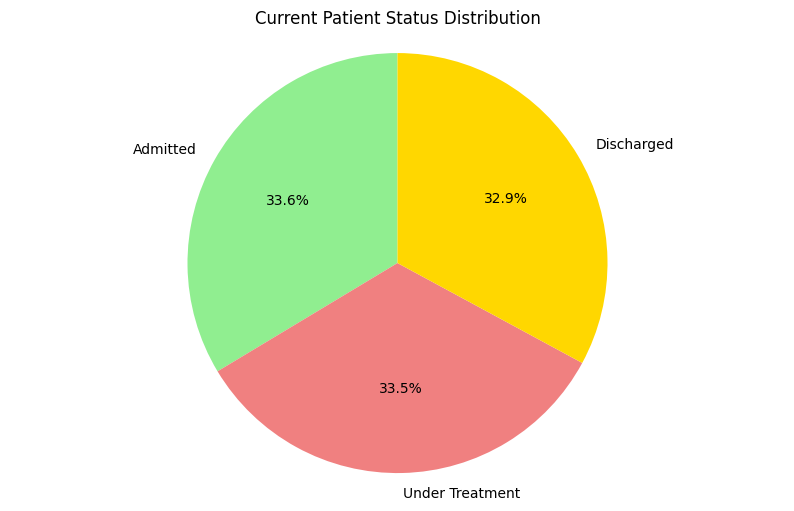

Current Patient Status Counts:
status
Admitted           5883
Under Treatment    5860
Discharged         5755
Name: count, dtype: int64


In [4]:
import matplotlib.pyplot as plt

# Count of currently admitted patients
admitted_counts = df['status'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(admitted_counts, labels=admitted_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'gold'], startangle=90)
plt.title('Current Patient Status Distribution')
plt.axis('equal')
plt.show()

# Print the counts
print("Current Patient Status Counts:")
print(admitted_counts)

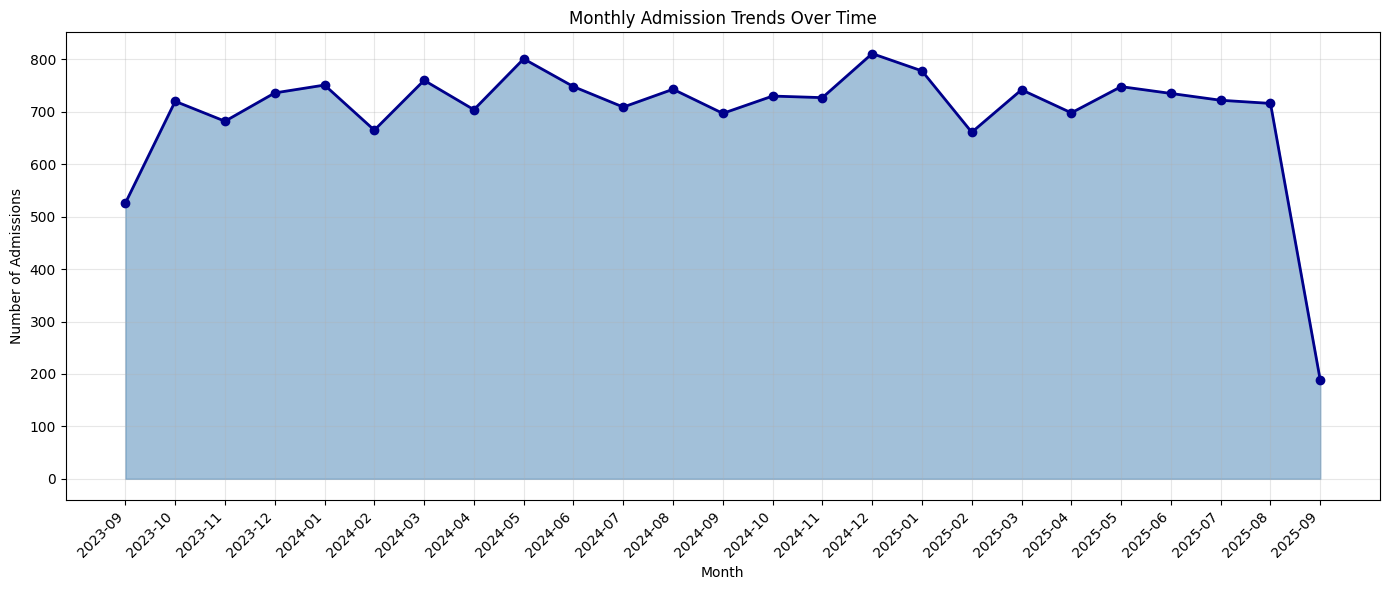

In [8]:
# Monthly admission trends - this area plot shows the cumulative pattern of admissions over time
df['admission_month'] = pd.to_datetime(df['admission_date']).dt.to_period('M')
monthly_admissions = df.groupby('admission_month').size()
plt.figure(figsize=(14,6))
plt.fill_between(range(len(monthly_admissions)), monthly_admissions.values, alpha=0.5, color='steelblue')
plt.plot(monthly_admissions.values, marker='o', color='darkblue', linewidth=2, markersize=6)
plt.title('Monthly Admission Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(range(len(monthly_admissions)), monthly_admissions.index.astype(str), rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

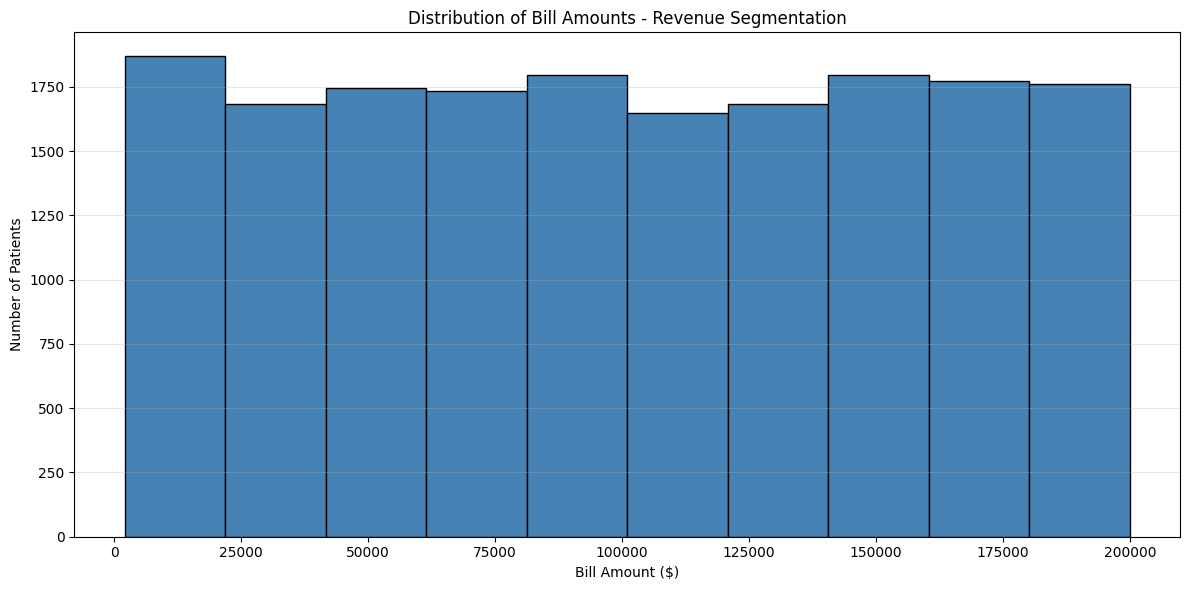

Revenue Statistics:
Total Revenue: $1,762,344,327.14
Average Bill Amount: $100,716.90
Min Bill Amount: $2,009.66
Max Bill Amount: $199,991.66


In [14]:
# High Revenue Patient Segmentation - Histogram showing the distribution of bill amounts across all patients
# This helps identify revenue patterns and clustering of patient costs
plt.figure(figsize=(12,6))
plt.hist(df['bill_amount'], bins=10, color='steelblue', edgecolor='black')
plt.title('Distribution of Bill Amounts - Revenue Segmentation')
plt.xlabel('Bill Amount ($)')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Calculate revenue statistics
print("Revenue Statistics:")
print(f"Total Revenue: ${df['bill_amount'].sum():,.2f}")
print(f"Average Bill Amount: ${df['bill_amount'].mean():,.2f}")
print(f"Min Bill Amount: ${df['bill_amount'].min():,.2f}")
print(f"Max Bill Amount: ${df['bill_amount'].max():,.2f}")